# 22 Nov

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist=tf.keras.datasets.mnist
(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

In [3]:
print(f'datatype:{x_train_full.dtype},shape is {x_train_full.shape}')

datatype:uint8,shape is (60000, 28, 28)


In [4]:
x_valid,x_train=x_train_full[:5000]/255.,x_train_full[5000:]/255.

In [5]:
y_valid,y_train=y_train_full[:5000]/255.,y_train_full[5000:]/255.

In [6]:
x_train[1].shape

(28, 28)

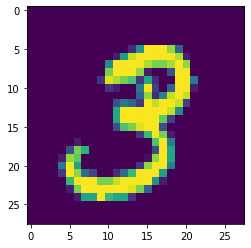

In [7]:
plt.imshow(x_train[1])

In [8]:
import seaborn as sns

<AxesSubplot:>

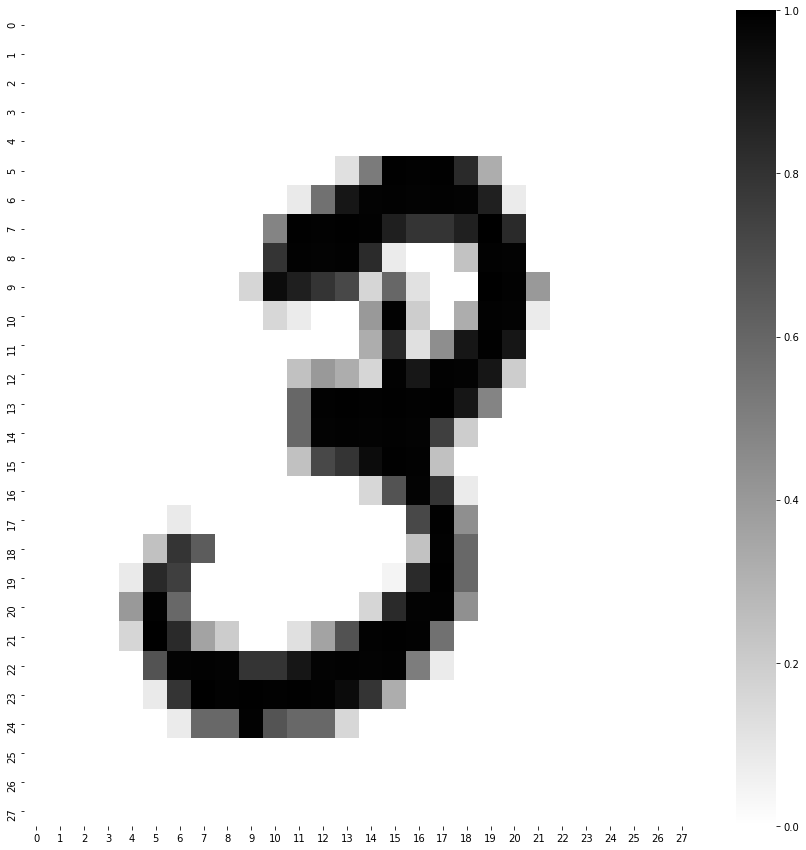

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[1],cmap='binary')

In [10]:
# create ANN
layers=[
    tf.keras.layers.Flatten(input_shape=[28,28],name="input_Layer"),
    tf.keras.layers.Dense(300,activation="relu",name="hidden_layer1"),
    tf.keras.layers.Dense(100,activation="relu",name="hidden_layer2"),
    tf.keras.layers.Dense(10,activation="softmax",name="outputlayer"),

]
model=tf.keras.models.Sequential(layers)


#### Altenative 1

```python
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

```

#### Alternative 2

```python
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
```

In [11]:
# print the layer
model.layers


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_Layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 300)               235500    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 100)               30100     
_________________________________________________________________
outputlayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [14]:
235500+30100+1010

266610

In [15]:
hidden1=model.layers[1]
hidden1.name

'hidden_layer1'

In [26]:
import numpy as np
np.load("hidden_layer1_bias_0.npy")

array([-7.3326528e-03, -3.3685244e-03, -1.8088974e-03, -4.0614987e-03,
        2.4648191e-02, -5.6961076e-03,  2.5851516e-02, -3.3716136e-04,
        2.2305737e-03,  8.0594989e-03, -2.8086607e-03, -3.8602078e-04,
        5.5594760e-04,  3.0355080e-04,  3.0565157e-04,  7.1715605e-03,
        1.1836516e-02,  2.6321489e-02,  6.3954911e-04, -1.4157484e-03,
        1.1898035e-03, -9.5832720e-03, -8.2006706e-03,  1.2283085e-02,
        2.2496583e-03, -3.4933635e-03, -3.5613283e-04,  8.5683605e-03,
        2.1510314e-02, -2.2344278e-04, -7.4680862e-03, -1.4682526e-03,
       -5.7300227e-04,  3.2982789e-03,  2.8274180e-03,  8.0037123e-04,
       -9.8079331e-03, -4.6710810e-03, -3.9035189e-03, -3.6855200e-03,
       -4.7376193e-03, -6.9519547e-03,  2.0804809e-02,  1.9419445e-02,
        1.5653439e-02,  1.6811753e-02, -3.9663054e-03,  9.4853817e-03,
       -4.1989116e-03,  2.1223493e-02, -5.1606884e-03, -2.5068121e-03,
        7.9168583e-04, -2.6960988e-03, -7.7583273e-03,  6.9891562e-04,
      

In [16]:
weights,biases=hidden1.get_weights()

In [17]:
weights,biases

(array([[ 0.02733549,  0.00929394,  0.06655136, ..., -0.00407921,
         -0.03086564,  0.01560977],
        [ 0.06361456, -0.06521838, -0.04519669, ..., -0.00533766,
         -0.01263581,  0.03308372],
        [-0.06724884,  0.0287589 ,  0.06347512, ..., -0.05442568,
          0.02833716, -0.01166544],
        ...,
        [-0.05038656, -0.01919259, -0.01915759, ...,  0.05686527,
          0.00245134,  0.06331398],
        [-0.07045727, -0.01372929,  0.04984553, ...,  0.0570512 ,
          0.00902786, -0.00128521],
        [-0.00131455, -0.0111829 ,  0.0278763 , ...,  0.05180547,
         -0.03115544,  0.02639242]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [18]:
print(f'shape {weights.shape}')

shape (784, 300)


In [19]:
# now we defined loss function and optimizer
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
MATRICS=["accuracy"]

# accurcy matrics want to print 

model.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=MATRICS)
# now our graph is ready,send the data for training


#### Alternatively 
```python
model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(0.02),
               metrics=["accuracy"])
```

In [34]:
EPOCHS=30
VALIDATION_SET=x_valid,y_valid
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 58us/sample - loss: 4.9215e-05 - accuracy: 0.0990 - val_loss: 4.1461e-05 - val_accuracy: 0.0958
Epoch 2/30
55000/55000 [==============================] - 3s 55us/sample - loss: 4.4653e-05 - accuracy: 0.0990 - val_loss: 3.7730e-05 - val_accuracy: 0.0958
Epoch 3/30
55000/55000 [==============================] - 3s 57us/sample - loss: 4.0849e-05 - accuracy: 0.0990 - val_loss: 3.4594e-05 - val_accuracy: 0.0958
Epoch 4/30
55000/55000 [==============================] - 3s 47us/sample - loss: 3.7629e-05 - accuracy: 0.0990 - val_loss: 3.1924e-05 - val_accuracy: 0.0958
Epoch 5/30
55000/55000 [==============================] - 3s 60us/sample - loss: 3.4869e-05 - accuracy: 0.0990 - val_loss: 2.9622e-05 - val_accuracy: 0.0958
Epoch 6/30
55000/55000 [==============================] - 3s 55us/sample - loss: 3.2475e-05 - accuracy: 0.0990 - val_loss: 2.7625e-05 - val_accuracy: 0.0958
Epoch 7/3

In [35]:
# save the model
import time
import os

def saveModelFilePath(model_dir="SAVED_MODEL"):
    os.makedirs(model_dir,exist_ok=True)
    filename=time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path=os.path.join(model_dir,filename)
    print(f'your model will be saved at following location\n{model_path}')
    return model_path      

In [36]:
unique_path=model.save(saveModelFilePath())

your model will be saved at following location
SAVED_MODEL\Model_2021_03_13_16_21_52_.h5


In [37]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.000049,0.098982,0.000041,0.0958
1,0.000045,0.098982,0.000038,0.0958
2,0.000041,0.098982,0.000035,0.0958
3,0.000038,0.098982,0.000032,0.0958
4,0.000035,0.098982,0.000030,0.0958
5,0.000032,0.098982,0.000028,0.0958
6,0.000030,0.098982,0.000026,0.0958
7,0.000029,0.098982,0.000024,0.0958
8,0.000027,0.098982,0.000023,0.0958
9,0.000025,0.098982,0.000022,0.0958


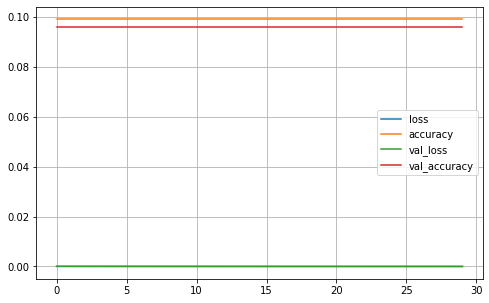

In [38]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

In [44]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[4555.30548359375, 0.098]

In [41]:
x_new=x_test[:3]
y_prob=model.predict(x_new)


In [42]:
y_pred=np.argmax(model.predict(x_new),axis=-1)

In [43]:
y_pred

array([0, 0, 0], dtype=int64)

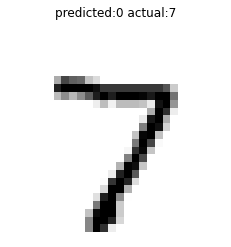

--------------------


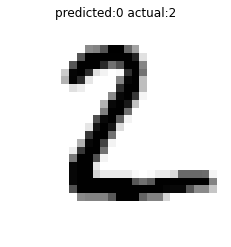

--------------------


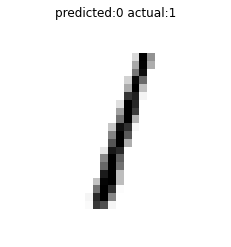

--------------------


In [49]:
for data,predict,actual in zip(x_new,y_pred,y_test[:3]):
    plt.imshow(data,cmap='binary')
    plt.title(f'predicted:{predict} actual:{actual}')
    plt.axis('off')
    plt.show()
    print("----"*5)

In [ ]:
# https://tensorspace.org/html/playground/lenet.html